In [20]:
##importing all the packages
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from collections import Counter
from pyinform import transfer_entropy
from pyinform import mutual_info


In [23]:
def visualize(four_hundred_cells):
    data_100 = four_hundred_cells[:100]
    data_200 = four_hundred_cells[100:200]
    data_300 = four_hundred_cells[200:300]
    data_400 = four_hundred_cells[300:400]



    q1 = np.reshape(data_100,(10,10))
    q2 = np.reshape(data_200,(10,10))
    q3 = np.reshape(data_300,(10,10))
    q4 = np.reshape(data_400,(10,10))

    figure,axis = plt.subplots(2,2, figsize=(10,10))
    plt.figure(figsize=(8, 8))
    sns.heatmap(q1, annot=True, cmap="Blues", ax=axis[0,1])
    axis[0,1].set_title("Q1")
    sns.heatmap(q2, annot=True, cmap="Blues", ax=axis[0,0])
    axis[0,0].set_title("Q2")
    sns.heatmap(q3, annot=True, cmap="Blues", ax=axis[1,0])
    axis[1,0].set_title("Q3")
    sns.heatmap(q4, annot=True, cmap="Blues", ax=axis[1,1])
    axis[1,1].set_title("Q4")
    figure.suptitle("Average Amount Of Transistions Per Cell")
    plt.show()

The Below Cell Will Show The Average Amount of Transfers Per Cell

0
20
40
60
80
100
120
140
160
180


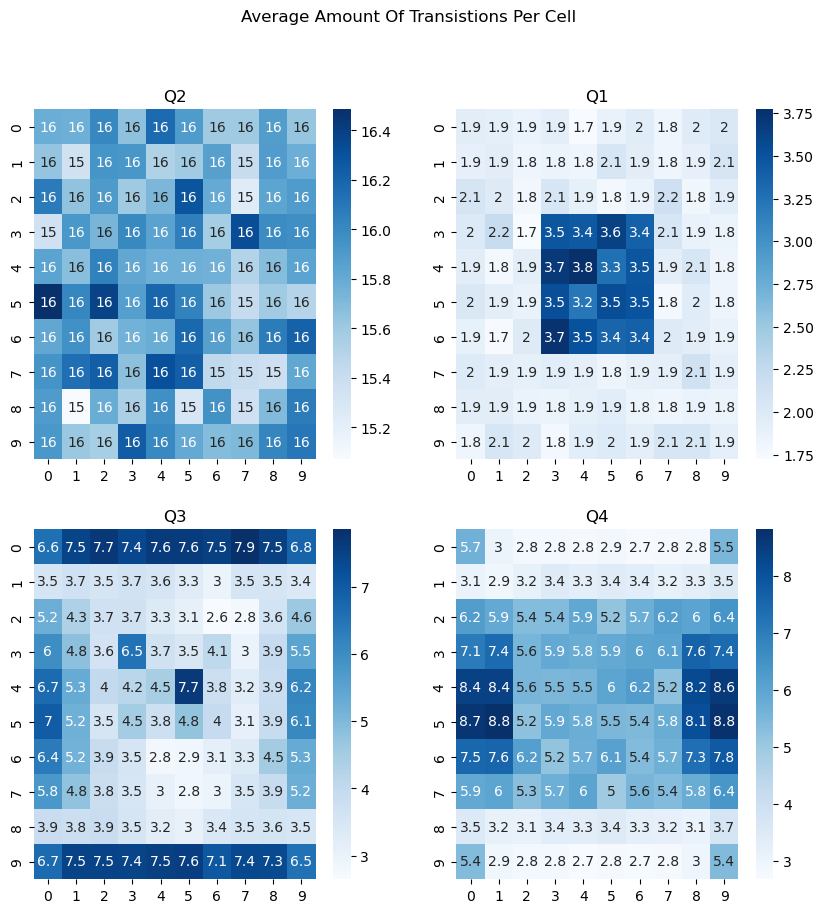

<Figure size 800x800 with 0 Axes>

In [6]:
num_df = 198
transitions_per_cell = [0] * 401
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   for i in range(1,df.shape[1]):
    num_cell_transistions = 0
    X = list(df.iloc[:,i])
    for j in range(1,len(X)):
        if X[j] != X[j-1]:
            num_cell_transistions+= 1
    transitions_per_cell[i-1] += num_cell_transistions

avg_trans = [trans/num_df for trans in transitions_per_cell]

##avg_trans is the data in list form that we are visualizing 

data_100 = avg_trans[:100]
data_200 = avg_trans[100:200]
data_300 = avg_trans[200:300]
data_400 = avg_trans[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, cmap="Blues", ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Average Amount Of Transistions Per Cell")
plt.show()

The Cell Below This Will Show the Amount of Unique Colors encountered in Each Cell on average

0
20
40
60
80
100
120
140
160
180


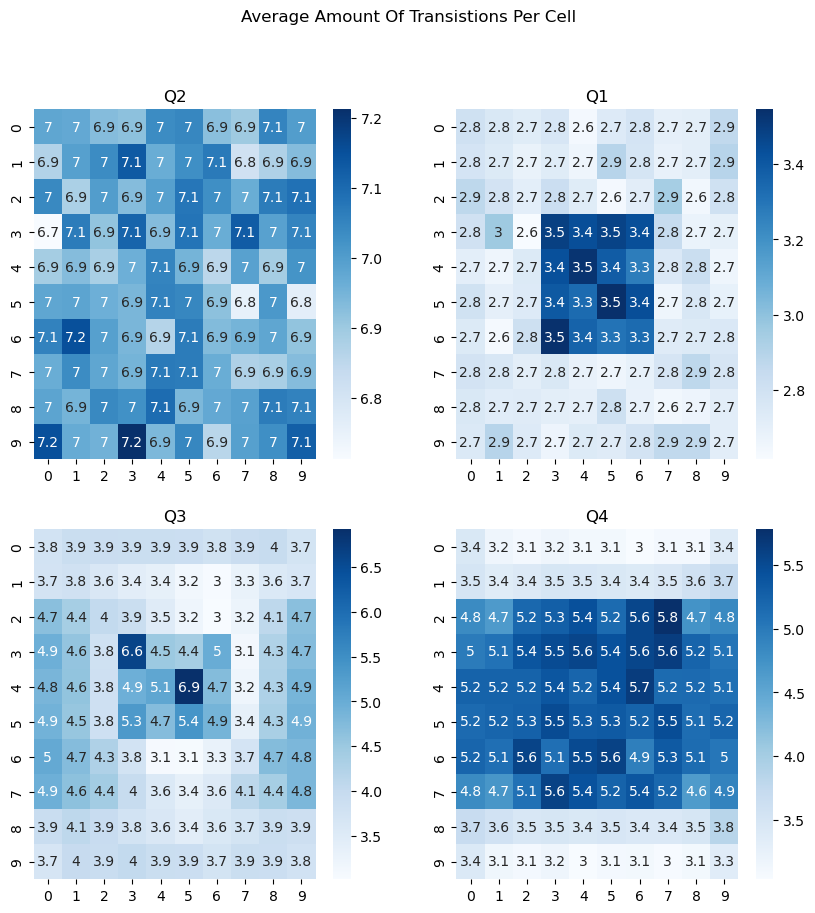

<Figure size 800x800 with 0 Axes>

In [26]:
num_df = 198
unique_colors = [0] * 401
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   for i in range(1,df.shape[1]):
    unique_colors[i-1] += len(list(df.iloc[:,i].unique()))


avg_unique = [unique_in_cell/num_df for unique_in_cell in unique_colors]

visualize(avg_unique)

The Cell Below Shows if any of the Cells share the Same Unique Set of Colors that They Have been

In [260]:
def get_list_of_cells_with_same_unique_colors(blackbox_num):
    unique_colors_per_cell = []
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(blackbox_num)+'.csv')
    for i in range(1,df.shape[1]):
        X = list(df.iloc[:,i].unique())
        unique_colors_per_cell.append(X)
    cells_with_the_same_unique_colors = []
    for cell_a,colors_a in enumerate(unique_colors_per_cell):
        for cell_b, colors_b in enumerate(unique_colors_per_cell):
            if cell_a == cell_b:
                continue
            if set(colors_a) == set(colors_b):
                cells_with_the_same_unique_colors.append([str(cell_a),str(cell_b)]) 
    return(cells_with_the_same_unique_colors)

def get_sorted_non_duplicated_list(list_of_cells_that_share_the_sane_colors):
    a = sorted(list(map(list, {tuple(sorted(cell_pair)) for cell_pair in list_of_cells_that_share_the_sane_colors})))
    return a

def intersect_two_sorted_lists(l1,l2):
    cells_that_share_colors_across_runs = []
    for element in l1:
        for element2 in l2:
            if set(element)==set(element2):
                cells_that_share_colors_across_runs.append(element)
    return sorted(cells_that_share_colors_across_runs)


def get_list_of_cells_with_same_unique_colors_ignore_first(blackbox_num): #this one ignores the first color because we are assuming a normal distribution of colors 
    unique_colors_per_cell = []
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(blackbox_num)+'.csv')
    for i in range(1,df.shape[1]):
        X = list(df.iloc[:,i].unique())[1:]
        unique_colors_per_cell.append(X)
    cells_with_the_same_unique_colors = []
    for cell_a,colors_a in enumerate(unique_colors_per_cell):
        for cell_b, colors_b in enumerate(unique_colors_per_cell):
            if cell_a == cell_b:
                continue
            if set(colors_a) == set(colors_b):
                cells_with_the_same_unique_colors.append([str(cell_a),str(cell_b)]) 
    return(cells_with_the_same_unique_colors)

The Below Code starts by testing to see if any two cells share the same unique color combination. 
If Cell 1 were to have colors of gru, icn, and las; cell 2 were to have icn, gru, and las; and cell three were to have icn, gru, las, and bru, then only cells one and 2 would be a match. 
We then test to see if any of these cells that have the same patterns match across different runs
they do not. the end

In [273]:
a = get_sorted_non_duplicated_list(get_list_of_cells_with_same_unique_colors_ignore_first(0))
#a
b = get_sorted_non_duplicated_list(get_list_of_cells_with_same_unique_colors_ignore_first(1))
c = get_sorted_non_duplicated_list(get_list_of_cells_with_same_unique_colors_ignore_first(2))
d = get_sorted_non_duplicated_list(get_list_of_cells_with_same_unique_colors_ignore_first(3))
e = get_sorted_non_duplicated_list(get_list_of_cells_with_same_unique_colors_ignore_first(4))
# f = intersect_two_sorted_lists(d,c)
# g = intersect_two_sorted_lists(e,f)
# g 
intersect_two_sorted_lists(intersect_two_sorted_lists(intersect_two_sorted_lists(a,b),intersect_two_sorted_lists(c,d)),e)

[]

In [90]:
unique_colors_per_cell = []

df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_0.csv')
for i in range(1,df.shape[1]):
    X = list(df.iloc[:,i].unique())
    unique_colors_per_cell.append(X)


cells_with_the_same_unique_colors = []
for cell_a,colors_a in enumerate(unique_colors_per_cell):
    for cell_b, colors_b in enumerate(unique_colors_per_cell):
        if cell_a == cell_b:
            continue
        if set(colors_a) == set(colors_b):
            cells_with_the_same_unique_colors.append([str(cell_a),str(cell_b)])


In [91]:
df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_1.csv')
for i in range(1,df.shape[1]):
    X = list(df.iloc[:,i].unique())
    unique_colors_per_cell.append(X)


cells_with_the_same_unique_colors2 = []
for cell_a,colors_a in enumerate(unique_colors_per_cell):
    for cell_b, colors_b in enumerate(unique_colors_per_cell):
        if cell_a == cell_b:
            continue
        if set(colors_a) == set(colors_b):
            cells_with_the_same_unique_colors2.append([str(cell_a),str(cell_b)])


In [105]:

cells_that_share_colors_across_runs = []
a = sorted(list(map(list, {tuple(sorted(cell_pair)) for cell_pair in cells_with_the_same_unique_colors})))
b = sorted(list(map(list, {tuple(sorted(cell_pair)) for cell_pair in cells_with_the_same_unique_colors2})))
for element in a:
    for element2 in b:
        if set(element)==set(element2):
            cells_that_share_colors_across_runs.append(element)
sorted(cells_that_share_colors_across_runs)

[['0', '376'],
 ['0', '84'],
 ['1', '18'],
 ['1', '26'],
 ['1', '35'],
 ['1', '47'],
 ['1', '49'],
 ['1', '5'],
 ['1', '50'],
 ['1', '6'],
 ['1', '86'],
 ['1', '92'],
 ['101', '173'],
 ['102', '187'],
 ['106', '147'],
 ['108', '127'],
 ['108', '140'],
 ['109', '130'],
 ['109', '176'],
 ['109', '254'],
 ['111', '159'],
 ['111', '160'],
 ['111', '189'],
 ['113', '145'],
 ['113', '197'],
 ['114', '139'],
 ['114', '171'],
 ['115', '136'],
 ['115', '151'],
 ['115', '161'],
 ['12', '75'],
 ['12', '89'],
 ['12', '93'],
 ['121', '133'],
 ['122', '137'],
 ['122', '152'],
 ['122', '153'],
 ['123', '155'],
 ['123', '163'],
 ['124', '167'],
 ['125', '185'],
 ['127', '140'],
 ['128', '192'],
 ['129', '150'],
 ['129', '334'],
 ['13', '213'],
 ['13', '51'],
 ['13', '61'],
 ['13', '69'],
 ['13', '70'],
 ['13', '79'],
 ['13', '8'],
 ['13', '85'],
 ['130', '176'],
 ['130', '254'],
 ['131', '134'],
 ['131', '172'],
 ['131', '195'],
 ['131', '246'],
 ['132', '156'],
 ['132', '158'],
 ['132', '193'],
 ['13

Testing for Mutual Information for Lists of Different Lengths

In [164]:
colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}

X = (df.iloc[:,2])
Y = (df.iloc[:,3])

#X.replace(colors_to_numbers).unique().tolist()


#mutual_info_num = mutual_info(X.replace(colors_to_numbers).unique().tolist(),Y.replace(colors_to_numbers))

mutual_info_num

0.6120759482332261

In [165]:
color = []
diff_indices = df[df.iloc[:,3] != df.iloc[:,3].shift()].index.to_list()
diff_indices[1:]

color.append(df.iloc[[index for index in diff_indices],3])
color
df.iloc[386,3]



'gru'

In [236]:
X = df['Q4-pos397'].replace(colors_to_numbers)[:200]
Y = df['Q4-pos398'].replace(colors_to_numbers)[:200]


mutual_info(X,Y)

0.7210718216435266

In [287]:
diff_indices = df[df['Q4-pos396'] != df['Q4-pos396'].shift()].index.to_list()
print(diff_indices)




X = df['Q4-pos396'].replace(colors_to_numbers)[47-40:47+40]
Y = df['Q4-pos397'].replace(colors_to_numbers)[47-40:47+40]

mutual_info(X,Y)


[0, 47, 54, 236, 275]


0.19885687180608624

The below Cells look at, and graph the distribution of colors at the end state of the Black Box for Quadrant 2 (not the entirely black one)

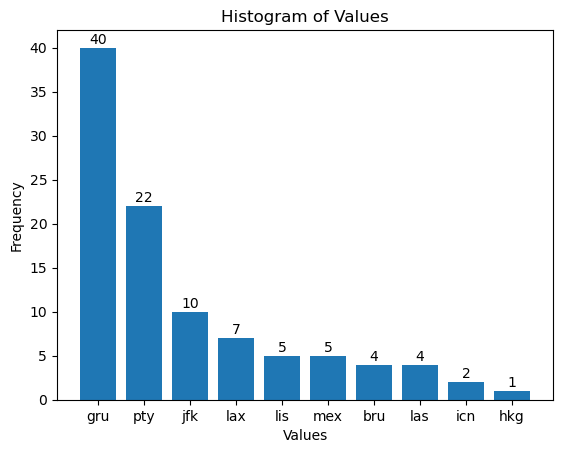

In [296]:
df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_0.csv')

X = df.iloc[2000,1:].to_list()[100:200]
counter_sum = Counter(X)


labels = list(counter_sum.keys())
freqs = list(counter_sum.values())

labels, freqs = zip(*(sorted(counter_sum.items(),key = lambda x : x[1], reverse = True)))

plt.bar(labels, freqs)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
for i, freq in enumerate(freqs):
    plt.text(labels[i], freq + 0.1, str(freq), ha='center', va='bottom')

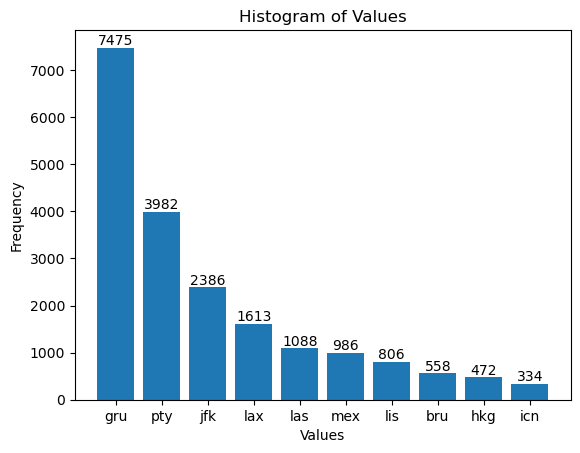

In [298]:
counter_sum = Counter()
for df_counter in range(1,198):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
    counter_sum+=Counter(df.iloc[2000,1:].tolist()[100:200])


# df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_0.csv')
# a = Counter(df.iloc[0,1:].tolist())

labels = list(counter_sum.keys())
freqs = list(counter_sum.values())

labels, freqs = zip(*(sorted(counter_sum.items(),key = lambda x : x[1], reverse = True)))

plt.bar(labels, freqs)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
for i, freq in enumerate(freqs):
    plt.text(labels[i], freq + 0.1, str(freq), ha='center', va='bottom')

Next, lets take a deeper dive at state transitions. My rough goal is to look at a particular cell, lets say Cell 1, and write down all of its state transistions as well as the time when it makes that transition. Il use this as a basis for comparitive mutual information calculation

In [ ]:
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   for i in range(1,df.shape[1]):
    num_cell_transistions = 0
    X = list(df.iloc[:,i])
    for j in range(1,len(X)):
        if X[j] != X[j-1]:
            num_cell_transistions+= 1
    transitions_per_cell[i-1] += num_cell_transistions

In [346]:

location_of_transition = []
color_at_transition=[]
df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_0.csv').replace(colors_to_numbers)
X = list(df.iloc[:,390])
color_at_transition.append(X[0])
location_of_transition.append(0)
for j in range(1,len(X)):
    if X[j] != X[j-1]:
        color_at_transition.append(X[j])
        location_of_transition.append(j)

Z = (dict(zip(location_of_transition,color_at_transition)))
print(color_at_transition)

[2, 4, 6, 7, 8, 7]


In [364]:
##now that we know about the rug rule lets code it and see if we can get mutual information to pop off 
##first thing first is to get the transitions only of a particular cell. For this case lets work with cell 390 we call the transition Z

df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_0.csv')
df = df.replace(colors_to_numbers)

colors_of_cell_n = []
for i in range(391,392):#df.shape[1]):
    print(i)
    #get the state of cell X at time step Z
    for index, elem in Z.items():
        print(index)
        print(elem)
        colors_of_cell_n.append(df.iloc[index,i])
        
colors_of_cell_n
# for index, elem in Z.items():
#     print(index)
#     print(elem)

391
0
2
20
4
202
6
521
7
949
8
1574
7


[9, 4, 5, 4, 4, 4]

In [365]:
#df.iloc[5:10,6].replace(colors_to_numbers)

print(color_at_transition)
print(colors_of_cell_n)

mutual_info(color_at_transition,colors_of_cell_n)
#
#Z
# df.iloc[1574,1]

[2, 4, 6, 7, 8, 7]
[9, 4, 5, 4, 4, 4]


1.2516291673878228

In [354]:
df.head()

df_B = df.replace(colors_to_numbers)

df_B.head()

,Unnamed: 0,Q1-pos0,Q1-pos1,Q1-pos2,Q1-pos3,Q1-pos4,Q1-pos5,Q1-pos6,Q1-pos7,Q1-pos8,...,Q4-pos390,Q4-pos391,Q4-pos392,Q4-pos393,Q4-pos394,Q4-pos395,Q4-pos396,Q4-pos397,Q4-pos398,Q4-pos399
0,0,9,0,9,4,1,0,0,1,5,...,9,2,6,7,7,0,4,4,3,1
1,1,9,0,9,4,1,0,0,1,5,...,9,2,6,7,7,0,4,4,3,1
2,2,9,0,9,4,1,0,0,1,5,...,9,2,6,7,7,4,4,4,3,1
3,3,9,0,9,4,1,0,0,1,5,...,9,2,6,7,7,4,4,4,3,1
4,4,9,0,9,4,1,0,0,1,5,...,9,2,6,7,7,4,4,4,3,1


[2, 4, 6, 7, 8, 7]


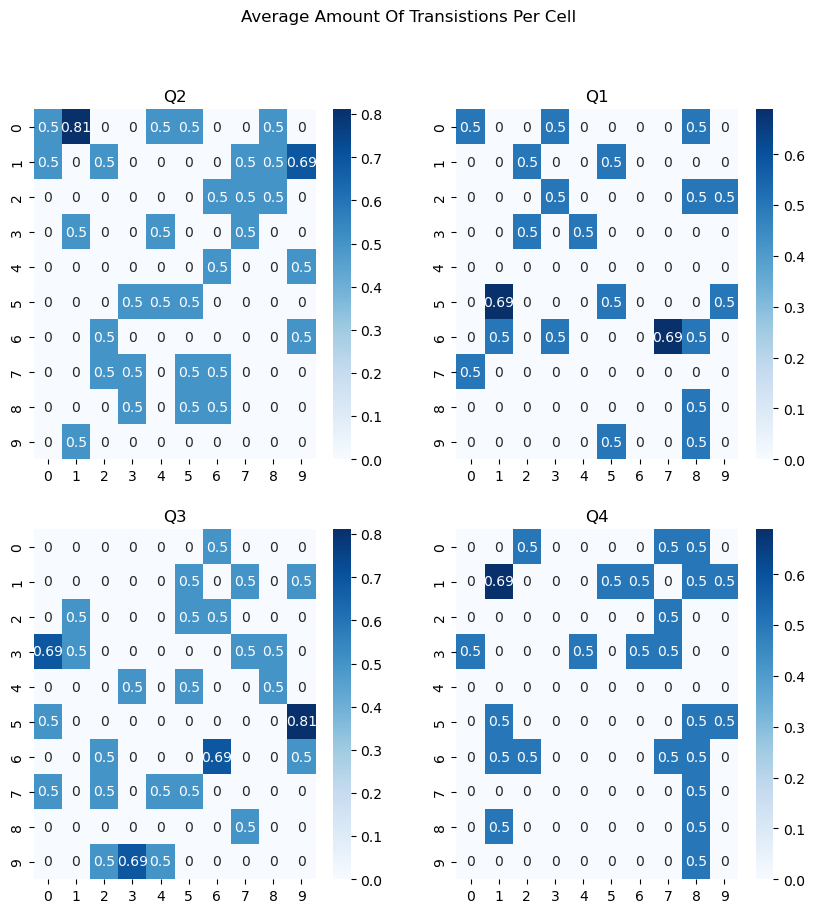

<Figure size 800x800 with 0 Axes>

In [462]:
#okay so now lets code the mutual information between the cell 1 transistions and the rtest of the black box. 

#start by getting all the transitions of cell 1
baseline_cell = 390
baseline_cell_colors = []
baseline_cell_transition_index =[]
df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_0.csv').replace(colors_to_numbers) #repalce the black box colors to numbers 
X = list(df.iloc[:,baseline_cell])  #gets the entire baseline cell column
baseline_cell_colors.append(X[0]) #initializes the colors 
baseline_cell_transition_index.append(0) #initializes the index of where the first color is 
for j in range(1,len(X)):
    if X[j] != X[j-1]:
        baseline_cell_colors.append(X[j]) #appends the color to the list at the time of the change 
        baseline_cell_transition_index.append(j) ## appends the index of the color change top the list 

Z = (dict(zip(location_of_transition,color_at_transition)))
print(baseline_cell_colors)

mutual_info_state_transitions_same_timestep = [0] * 400

for i in range(1,df.shape[1]): #this loops through all 400 cells 
    comparator_cell_column = df.iloc[:,i] #gets the entire column of the cell we are working on 
    #print(comparator_cell_colomn)
    if i == baseline_cell:
            mutual_info_state_transitions_same_timestep[i] = 0
            continue
    comparator_cell_colors = []
    for j in baseline_cell_transition_index: #goes through the index of where the baseline cell changed color
        if j ==0:
            comparator_cell_colors.append(comparator_cell_column[j]) 
        else:
            comparator_cell_colors.append(comparator_cell_column[j-1]) #gets the color of the comparator cell at that point in time 
    mutual_info_state_transitions_same_timestep[i-1]=(mutual_info(baseline_cell_colors,comparator_cell_colors))

data_100 = mutual_info_state_transitions_same_timestep[:100]
data_200 = mutual_info_state_transitions_same_timestep[100:200]
data_300 = mutual_info_state_transitions_same_timestep[200:300]
data_400 = mutual_info_state_transitions_same_timestep[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, cmap="Blues", ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Average Amount Of Transistions Per Cell")
plt.show()

In [468]:
#lets do the MI for the entire list of black boxes


#start by getting all the transitions of cell 1
baseline_cell = 54
num_df = 198
transitions_per_cell = [0] * 401
mutual_info_state_transitions_same_timestep = [0] * 400
for df_counter in range(0, num_df):
    if df_counter%20==0:
        print(df_counter)
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv').replace(colors_to_numbers)
    baseline_cell_colors = []
    baseline_cell_transition_index =[]
    X = list(df.iloc[:,baseline_cell])
    baseline_cell_colors.append(X[0])
    baseline_cell_transition_index.append(0)
    for j in range(1,len(X)):
        if X[j] != X[j-1]:
            baseline_cell_colors.append(X[j]) #appends the color to the list at the time of the change 
            baseline_cell_transition_index.append(j) ## appends the index of the color change top the list
    # Z = (dict(zip(location_of_transition,color_at_transition)))
    # print(Z)
    for i in range(1,df.shape[1]): #this loops through all 400 cells 
        comparator_cell_column = df.iloc[:,i] #gets the entire column of the cell we are working on 
        # if i == baseline_cell:
        #         mutual_info_state_transitions_same_timestep[i] = 0
        #         continue
        comparator_cell_colors = []
        for j in baseline_cell_transition_index: #goes through the index of where the baseline cell changed color
            if j ==0:
                comparator_cell_colors.append(comparator_cell_column[j]) 
            else:
                comparator_cell_colors.append(comparator_cell_column[j-1]) #gets the color of the comparator cell at that point in time 
        mutual_info_state_transitions_same_timestep[i-1]+=(mutual_info(baseline_cell_colors,comparator_cell_colors))

mutual_info_state_transitions_same_timestep = [mi/num_df for mi in mutual_info_state_transitions_same_timestep]






0
20
40
60
80
100
120
140
160
180


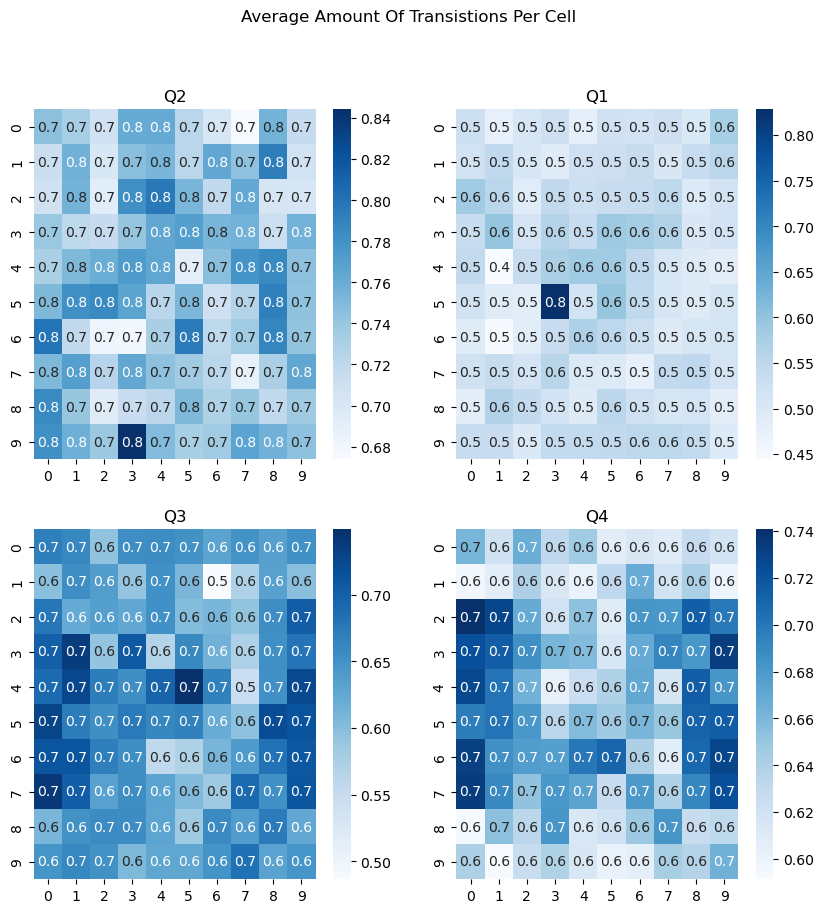

<Figure size 800x800 with 0 Axes>

In [469]:
data_100 = mutual_info_state_transitions_same_timestep[:100]
data_200 = mutual_info_state_transitions_same_timestep[100:200]
data_300 = mutual_info_state_transitions_same_timestep[200:300]
data_400 = mutual_info_state_transitions_same_timestep[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f",cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True,fmt=".1f", cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f",cmap="Blues", ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Average Amount Of Transistions Per Cell")
plt.show()

In [500]:
baseline_cell = 390
num_df = 198
transitions_per_cell = [0] * 401
mutual_info_state_transitions_same_timestep = [0] * 400
for df_counter in range(0, num_df):
    print(df_counter)
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv').replace(colors_to_numbers)
    baseline_cell_colors = []
    baseline_cell_transition_index =[]
    if df_counter==58 or df_counter==68:
        continue
    X = list(df.iloc[:,baseline_cell])
    baseline_cell_colors.append(X[0])
    baseline_cell_transition_index.append(0)
    for j in range(1,len(X)):
        if X[j] != X[j-1]:
            baseline_cell_colors.append(X[j]) #appends the color to the list at the time of the change 
            baseline_cell_transition_index.append(j) ## appends the index of the color change top the list
    # Z = (dict(zip(location_of_transition,color_at_transition)))
    # print(Z)
    for i in range(1,df.shape[1]): #this loops through all 400 cells 
        comparator_cell_column = df.iloc[:,i] #gets the entire column of the cell we are working on 
        # if i == baseline_cell:
        #         mutual_info_state_transitions_same_timestep[i] = 0
        #         continue
        comparator_cell_colors = []
        for j in baseline_cell_transition_index: #goes through the index of where the baseline cell changed color
            if j ==0:
                comparator_cell_colors.append(comparator_cell_column[j]) 
            else:
                comparator_cell_colors.append(comparator_cell_column[j-1]) #gets the color of the comparator cell at that point in time 
        try:
            mutual_info_state_transitions_same_timestep[i-1]+=(transfer_entropy(baseline_cell_colors,comparator_cell_colors,k=2))
        except:
            continue

mutual_info_state_transitions_same_timestep = [mi/num_df for mi in mutual_info_state_transitions_same_timestep]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197


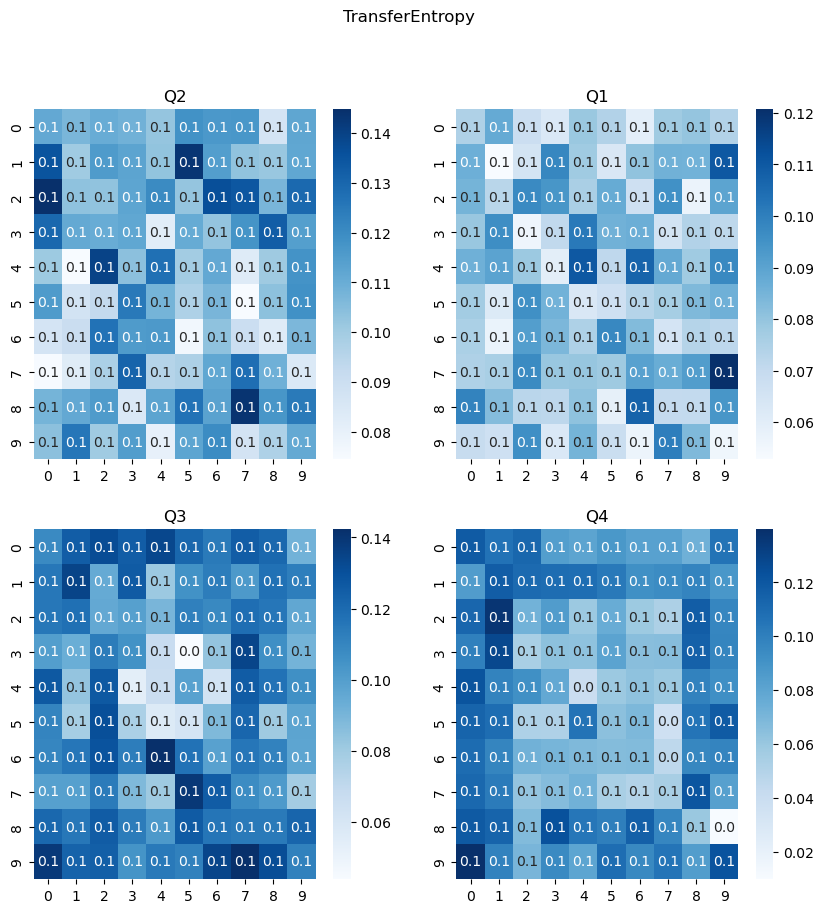

<Figure size 800x800 with 0 Axes>

In [501]:
data_100 = mutual_info_state_transitions_same_timestep[:100]
data_200 = mutual_info_state_transitions_same_timestep[100:200]
data_300 = mutual_info_state_transitions_same_timestep[200:300]
data_400 = mutual_info_state_transitions_same_timestep[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f",cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True,fmt=".1f", cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f",cmap="Blues", ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("TransferEntropy")
plt.show()

In [490]:
baseline_cell = 101

df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_5.csv').replace(colors_to_numbers)
baseline_cell_colors = []
baseline_cell_transition_index =[]
X = list(df.iloc[:,baseline_cell])
baseline_cell_colors.append(X[0])
baseline_cell_transition_index.append(0)
for j in range(1,len(X)):
    if X[j] != X[j-1]:
        baseline_cell_colors.append(X[j]) #appends the color to the list at the time of the change 
        baseline_cell_transition_index.append(j)
baseline_cell_colors

[3, 1, 0, 3, 2, 0, 1, 3, 0, 1, 9, 0, 1, 7, 1, 6, 9, 0, 2]

In [503]:
baseline_cell_colors.corrwith(baseline_cell_colors,axis=0)

AttributeError: 'list' object has no attribute 'corrwith'

In [494]:
#9 to 6
zero =  0b0000
one =   0b0001
two =   0b0010
three = 0b0011
four =  0b0100
five =  0b0101
six =   0b0110
seven = 0b0111
eight = 0b1000
nine =  0b1001


print((one | two)%10)
print((four & five)%10)
print((three ^ four)%10)


#[tl][t][tr]
#[l][ ][r]
#[bl][b][br]







3
4
7
